<h1>Goodreads</h1>

In [2]:
import pandas as pd
import requests
import xmltodict
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
to_read_books_url = 'https://www.goodreads.com/review/list/' + user_id + '.xml?key=Ps9P2LhtrqgsfwEEA0iUA&v=2&shelf=to-read&per_page=200'
fallback_url = 'https://www.goodreads.com/review/list/52479819.xml?key=Ps9P2LhtrqgsfwEEA0iUA&v=2&shelf=to-read&per_page=200'
fallback_url_page2 = 'https://www.goodreads.com/review/list/52479819.xml?key=Ps9P2LhtrqgsfwEEA0iUA&v=2&shelf=to-read&per_page=200&page=2'
# need to add this because not all of 2019's books are in the first call (max 200 items)

In [5]:
to_read_request = requests.get(fallback_url)
to_read_request_2 = requests.get(fallback_url_page2)

In [6]:
to_read = xmltodict.parse(to_read_request.content)
to_read_2 = xmltodict.parse(to_read_request_2.content)

In [7]:
books = to_read['GoodreadsResponse']['reviews']['review']
books_2 = to_read_2['GoodreadsResponse']['reviews']['review']
all_books = books + books_2
len(all_books)
# yay all books are there

235

In [8]:
books[1]['date_added']

'Sat Jan 04 10:23:57 -0800 2020'

In [9]:
'2019' in 'Sat Jan 04 10:23:57 -0800 2020'

False

In [10]:
to_read_2019 = []
for book in all_books:
    print(book['book']['title'])
    print('date book added: ' + str(book['date_added']))
    if '2019' in book['date_added']:
        to_read_2019.append(book)
    else:
        print("book was not added in 2019")
    print()

Prozac Nation
date book added: Tue Jan 07 08:52:19 -0800 2020
book was not added in 2019

The Sellout
date book added: Sat Jan 04 10:23:57 -0800 2020
book was not added in 2019

Sum: Forty Tales from the Afterlives
date book added: Sat Dec 28 00:37:56 -0800 2019

The Age of Surveillance Capitalism: The Fight for a Human Future at the New Frontier of Power
date book added: Wed Dec 18 11:07:24 -0800 2019

Municipal Dreams: The Rise and Fall of Council Housing
date book added: Wed Dec 18 11:06:20 -0800 2019

The Bug
date book added: Fri Dec 13 08:50:36 -0800 2019

Quiet: The Power of Introverts in a World That Can't Stop Talking
date book added: Tue Dec 10 20:02:59 -0800 2019

Rethinking Camelot: Jfk, the Vietnam War, and U.S. Political Culture
date book added: Tue Dec 03 07:44:47 -0800 2019

Debt: The First 5,000 Years
date book added: Tue Dec 03 06:39:51 -0800 2019

The Utopia of Rules: On Technology, Stupidity, and the Secret Joys of Bureaucracy
date book added: Tue Dec 03 06:38:50 -08

In [11]:
len(to_read_2019)

100

In [20]:
to_read_2019[5]

OrderedDict([('id', '3071181980'),
             ('book',
              OrderedDict([('id',
                            OrderedDict([('@type', 'integer'),
                                         ('#text', '23374497')])),
                           ('isbn', '1608464458'),
                           ('isbn13', '9781608464456'),
                           ('text_reviews_count',
                            OrderedDict([('@type', 'integer'),
                                         ('#text', '1')])),
                           ('uri',
                            'kca://book/amzn1.gr.book.v1.IUXvJ0SYj2hi_PdSZIxi7Q'),
                           ('title',
                            'Rethinking Camelot: Jfk, the Vietnam War, and U.S. Political Culture'),
                           ('title_without_series',
                            'Rethinking Camelot: Jfk, the Vietnam War, and U.S. Political Culture'),
                           ('image_url',
                            'https://i.gr-assets.

In [13]:
date_occurances = []
for boo in to_read_2019:
    date_occurances.append(boo['date_added'][:10])

In [14]:
len(date_occurances)

100

In [15]:
len(set(date_occurances))

70

In [16]:
occ = Counter(date_occurances)

In [17]:
plt.rcParams["figure.figsize"] = (100,10)

<BarContainer object of 70 artists>

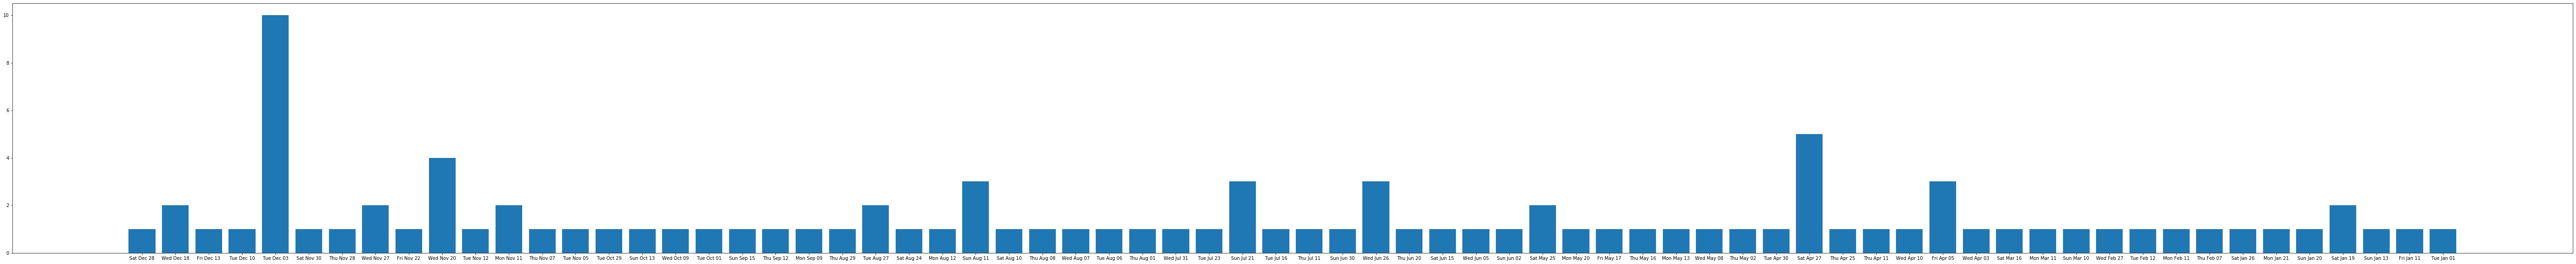

In [18]:
plt.bar(occ.keys(), occ.values())

In [21]:
# dates are un-ordered so attempt to takke a shortcut and strip characters instead of converting date string to a date object has failed!!